# Dimensionality reduction and regression with (vanilla) autoencoder

In [56]:
#load MNIST dataset 

%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#use the first 10k in the training dataset (just for demo)
x_train = x_train[0:10000]
y_train = y_train[0:10000]

#normalize the images
x_train = np.expand_dims(x_train/255.0, axis=-1)
x_test = np.expand_dims(x_test/255.0, axis=-1)

#define the labels
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

print(x_train.shape)
print(x_test.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [2]:
#plot function for sample images

def plot_tile(samples):
    
    num_samples, x_dim, y_dim, _ = samples.shape
    axes = (np.round(np.sqrt(num_samples))).astype(int)
    fig = plt.figure(figsize=(axes, axes))
    gs = gridspec.GridSpec(axes, axes)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_aspect('equal')
        plt.imshow(sample, cmap=plt.get_cmap('viridis'), aspect='auto')

Number of training data points (1001, 28, 28, 1)
Number of training data points (1127, 28, 28, 1)
Number of training data points (991, 28, 28, 1)
Number of training data points (1032, 28, 28, 1)
Number of training data points (980, 28, 28, 1)
Number of training data points (863, 28, 28, 1)
Number of training data points (1014, 28, 28, 1)
Number of training data points (1070, 28, 28, 1)
Number of training data points (944, 28, 28, 1)
Number of training data points (978, 28, 28, 1)


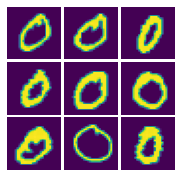

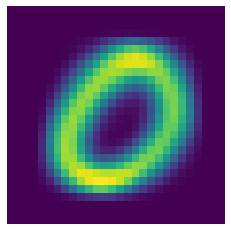

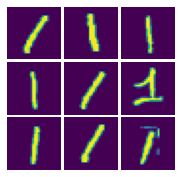

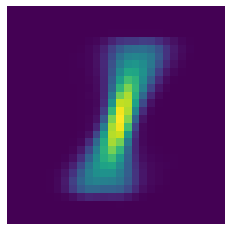

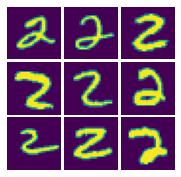

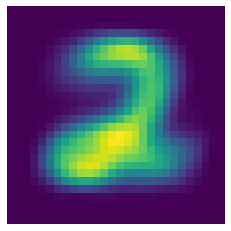

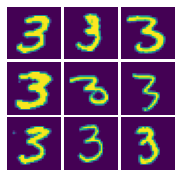

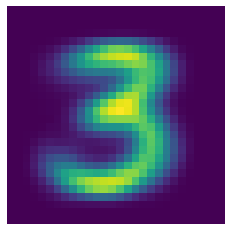

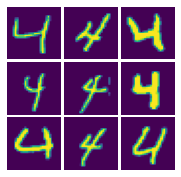

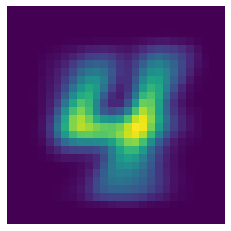

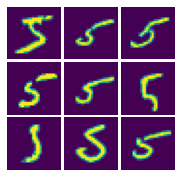

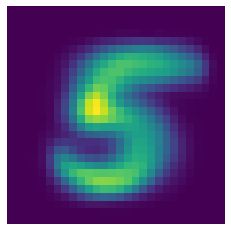

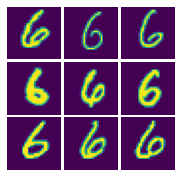

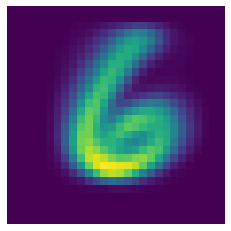

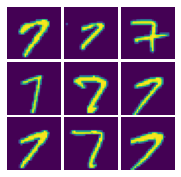

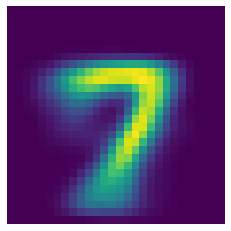

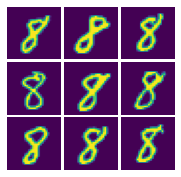

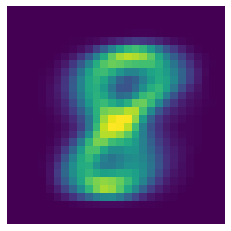

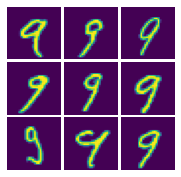

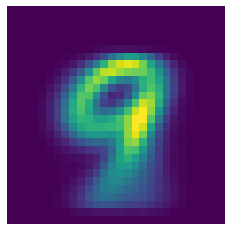

In [3]:
#visualize first 9 samples of input images based on class labels, within the training dataset

unique_labels, label_counts = np.unique(y_train, return_counts=True)

for label in unique_labels:
    x_train_perlabel = x_train[np.squeeze(y_train) == label]
    print("Number of training data points {}".format(x_train_perlabel.shape))
    fig = plot_tile(x_train_perlabel[0:9, :, :])
    
    x_train_perlabel_mean = np.mean(np.squeeze(x_train_perlabel), axis=0) 
    plt.figure(figsize=[4, 4])
    plt.imshow(x_train_perlabel_mean) 
    plt.axis('off')

Number of training data points (1001, 28, 28, 1)
Number of training data points (1127, 28, 28, 1)
Number of training data points (991, 28, 28, 1)
Number of training data points (1032, 28, 28, 1)
Number of training data points (980, 28, 28, 1)
Number of training data points (863, 28, 28, 1)
Number of training data points (1014, 28, 28, 1)
Number of training data points (1070, 28, 28, 1)
Number of training data points (944, 28, 28, 1)
Number of training data points (978, 28, 28, 1)


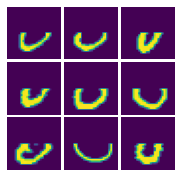

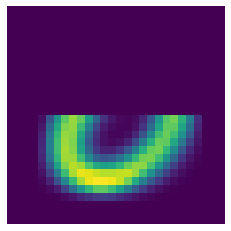

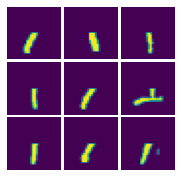

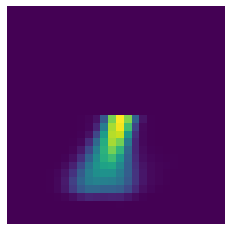

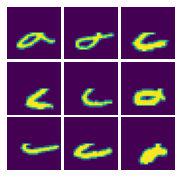

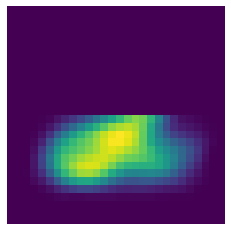

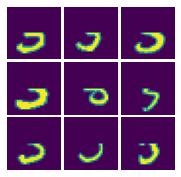

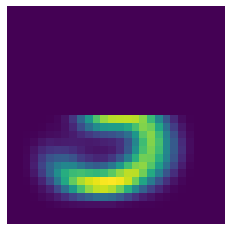

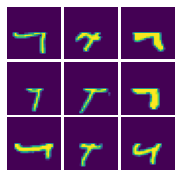

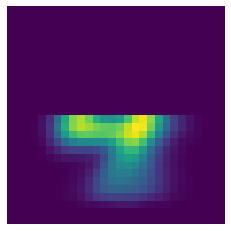

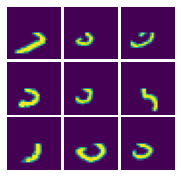

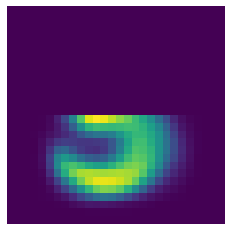

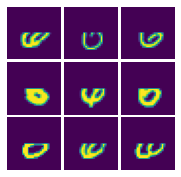

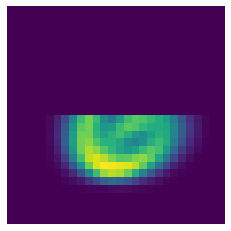

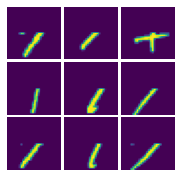

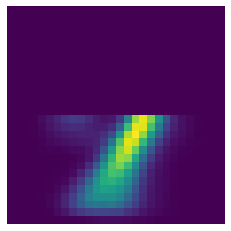

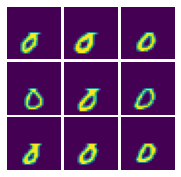

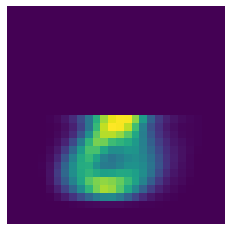

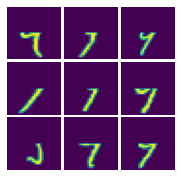

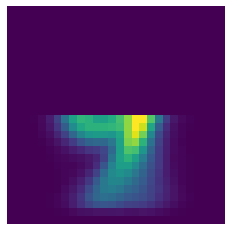

In [4]:
#hide the top half or bottom half

x_train_reg = np.copy(x_train)
x_test_reg = np.copy(x_test)

x_train_reg[:, 0:14, :, 0] = 0     #hide top half
x_test_reg[:, 0:14, :, 0] = 0

#x_train_reg[:, 14:, :, 0] = 0     #hide bottom half
#x_test_reg[:, 14:, :, 0] = 0

for label in unique_labels:
    x_train_perlabel = x_train_reg[np.squeeze(y_train) == label]
    print("Number of training data points {}".format(x_train_perlabel.shape))
    fig = plot_tile(x_train_perlabel[0:9, :, :])
    
    x_train_perlabel_mean = np.mean(np.squeeze(x_train_perlabel), axis=0) 
    plt.figure(figsize=[4, 4])
    plt.imshow(x_train_perlabel_mean) 
    plt.axis('off')

# Experiment 1: Regression with (vanilla) autoencoder

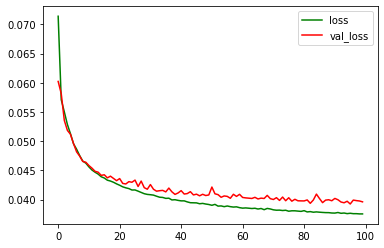

In [5]:
import autoencoderdual

z_dim = 3

AE = autoencoderdual.Autoencoder(x_train.shape[1], x_train.shape[2], z_dim)
AE.train_autoencoder2D(x_train_reg, x_train, load = False)

In [6]:
#lets get some regression with the trained model

reg_train_ae = AE.AE_m2m.predict(x_train_reg)
reg_test_ae = AE.AE_m2m.predict(x_test_reg)

print(reg_train_ae.shape)
print(reg_test_ae.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)


# Experiment 2: Regression and reconstruction with (vanilla) dual autoencoder

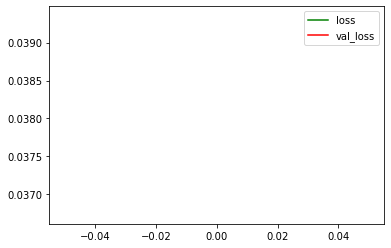

(150, 4)
(150, 4)


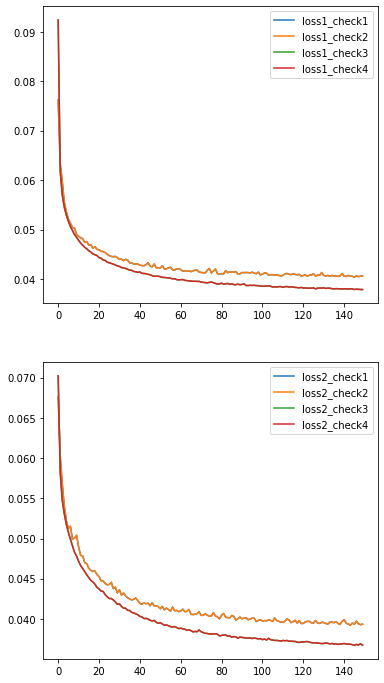

In [7]:
#dual autoencoder model

dual_AE = autoencoderdual.Autoencoder(x_train.shape[1], x_train.shape[2], z_dim)
dual_AE.train_autoencoder2D_dual(x_train_reg, x_train, load = False)

In [8]:
#lets get some reconstructions and regression with the trained model

recons_train = dual_AE.AE_m2m.predict(x_train)
recons_test = dual_AE.AE_m2m.predict(x_test)

print(recons_train.shape)
print(recons_test.shape)

reg_train = dual_AE.AE_m2m_reg.predict(x_train_reg)
reg_test = dual_AE.AE_m2m_reg.predict(x_test_reg)

print(reg_train.shape)
print(reg_test.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
#feed the autoencoder with half data

recons_train_half = dual_AE.AE_m2m.predict(x_train_reg)
recons_test_half = dual_AE.AE_m2m.predict(x_test_reg)

print(recons_train_half.shape)
print(recons_test_half.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)


# Experiment 3: Reconstruction with (vanilla) autoencoder

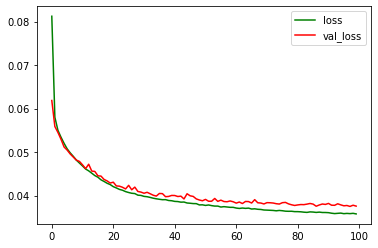

In [10]:
#autoencoder model for recons only

AE_recons = autoencoderdual.Autoencoder(x_train.shape[1], x_train.shape[2], z_dim)
AE_recons.train_autoencoder2D(x_train, x_train, load = False)

In [20]:
#lets get some recons with the trained model

recons_train2 = AE_recons.AE_m2m.predict(x_train)
recons_test2 = AE_recons.AE_m2m.predict(x_test)

print(recons_train2.shape)
print(recons_test2.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)


# Display results

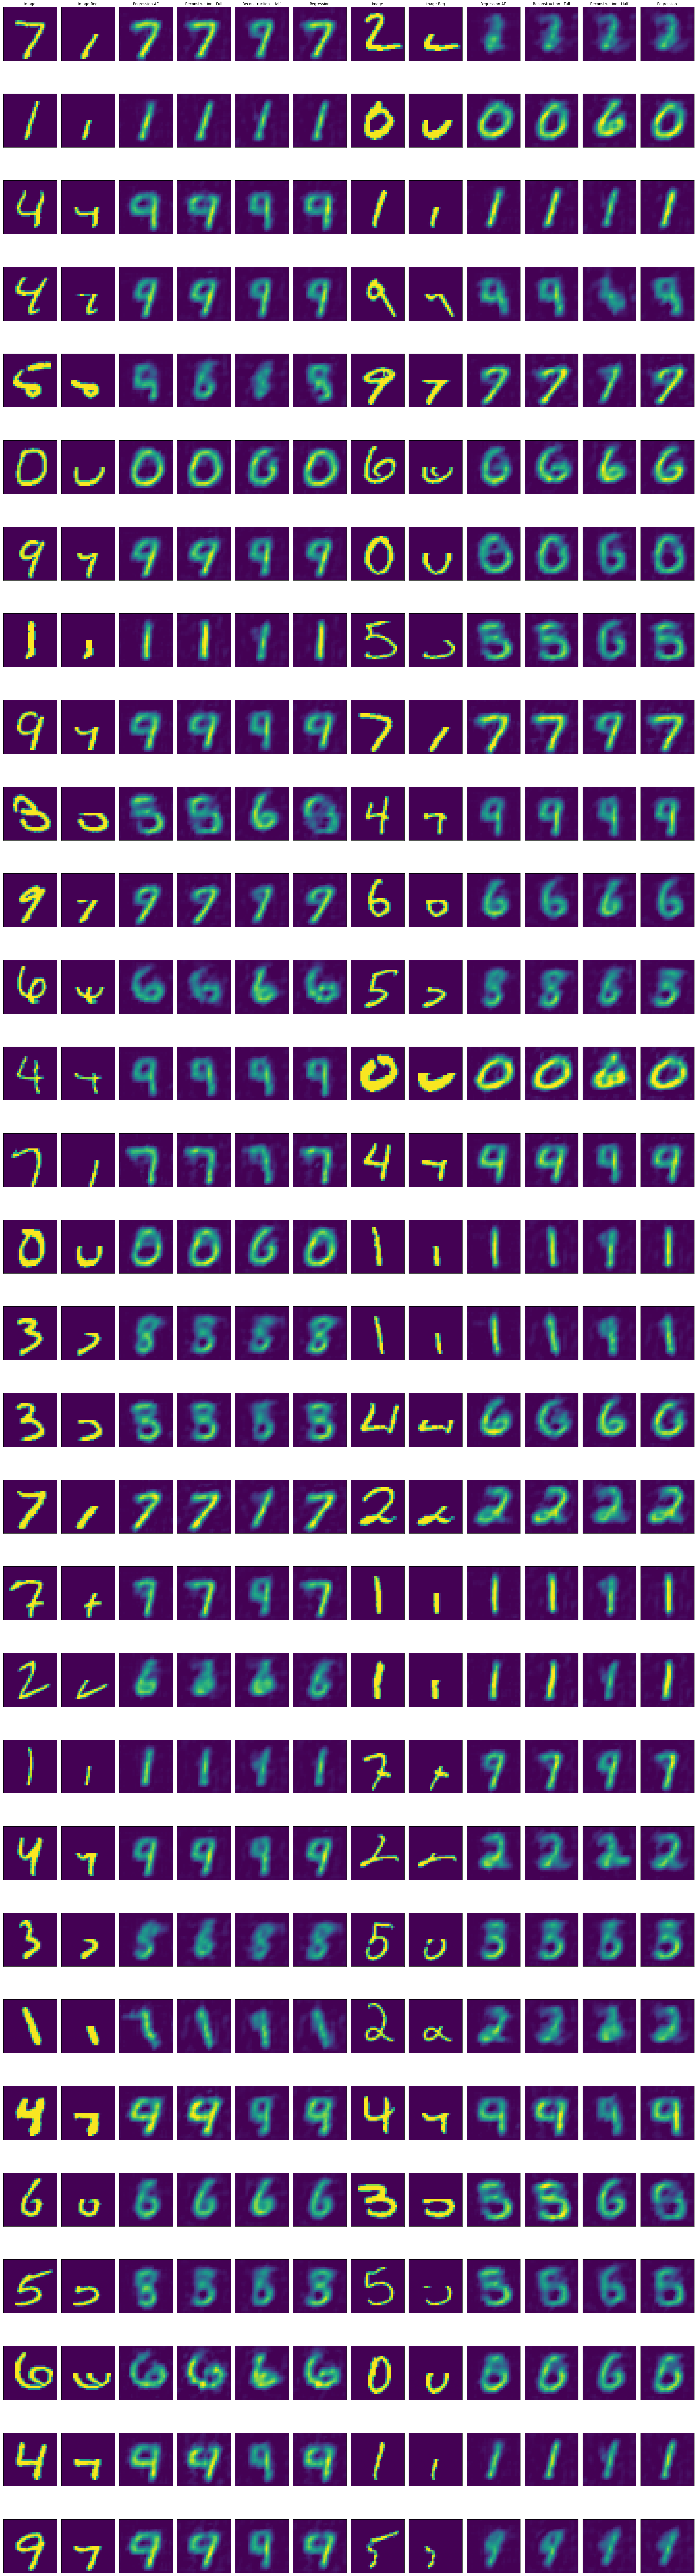

In [12]:
#plot some test images with predicted vs true labels

num_rows = 30
num_cols = 2
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*2*2*num_cols, 2*2*num_rows))
for i in range(num_images):
    
    plt.subplot(num_rows, 6*num_cols, 6*i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], vmin=0, vmax=1)
    if i < 2:
        plt.title('Image')
    
    plt.subplot(num_rows, 6*num_cols, 6*i+2)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_reg[i], vmin=0, vmax=1)
    if i < 2:
        plt.title('Image-Reg')
    
    plt.subplot(num_rows, 6*num_cols, 6*i+3)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reg_test_ae[i], vmin=0, vmax=1)
    if i < 2:
        plt.title('Regression-AE')
    
    plt.subplot(num_rows, 6*num_cols, 6*i+4)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(recons_test[i], vmin=0, vmax=1)
    if i < 2:
        plt.title('Reconstruction - Full')
        
    plt.subplot(num_rows, 6*num_cols, 6*i+5)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(recons_test_half[i], vmin=0, vmax=1)
    if i < 2:
        plt.title('Reconstruction - Half')
        
    plt.subplot(num_rows, 6*num_cols, 6*i+6)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reg_test[i], vmin=0, vmax=1)
    if i < 2:
        plt.title('Regression')
    
plt.tight_layout()
plt.show()

# Tabulate the RMSE

In [13]:
def RMSE(x, y, portion='full'):
    if portion == 'full':
        RMSE = np.sqrt(np.mean((x.flatten() - y.flatten())**2))
    elif portion == 'upper':
        RMSE = np.sqrt(np.mean((x[:, 0:14, :, 0].flatten() - y[:, 0:14, :, 0].flatten())**2))
    elif portion == 'lower':
        RMSE = np.sqrt(np.mean((x[:, 14:, :, 0].flatten() - y[:, 14:, :, 0].flatten())**2))
    else:
        print('Not implemented')
    return RMSE

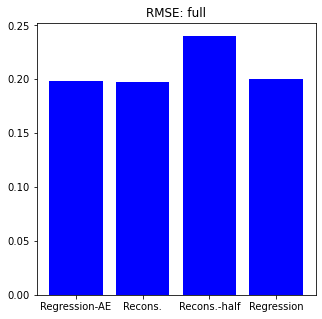

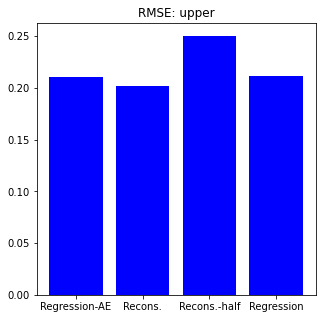

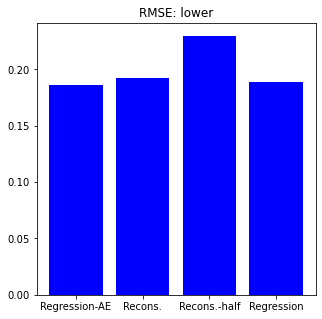

In [14]:
#calculate the RMSE for the entire image

portions = ['full', 'upper', 'lower']
labels = ['Regression-AE', 'Recons.', 'Recons.-half', 'Regression']

for p in portions:
    RMSEs = [RMSE(x_test, reg_test_ae, p), 
             RMSE(x_test, recons_test, p), 
             RMSE(x_test, recons_test_half, p), 
             RMSE(x_test, reg_test, p)]

    plt.figure(figsize=[5, 5])
    plt.bar(labels, RMSEs, color='b')
    plt.title('RMSE: ' + p)

# Latent space exploration of autoencoders

In [33]:
def explore_latent_space(model, x_test, sample_1, sample_2, num_samples):
    #sample two images from the testing set and uniformly sample the latent spaces (all zs)
    sample_1 = x_test[sample_1:sample_1+1]
    sample_2 = x_test[sample_2:sample_2+1]
    sample_1_z = model.AE_m2z.predict(sample_1)
    sample_2_z = model.AE_m2z.predict(sample_2)

    samples_z = np.linspace(sample_1_z, sample_2_z, num_samples, endpoint=True)

    #display the reconstructed images from the samples
    samples_image = model.AE_z2m.predict(np.squeeze(samples_z))

    #display sampled images
    plt.figure(figsize=[16, 4])
    for i in range(num_samples):
        plt.subplot(1, 10, i+1)
        plt.imshow(np.squeeze(samples_image[i:i+1]), vmin=0, vmax=1)
        plt.axis('off')

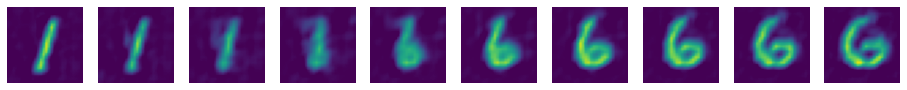

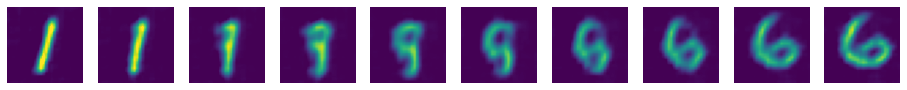

In [34]:
#experiment 1 is a data-model regression, so we can't do this

sample_1 = 2
sample_2 = 11
num_samples = 10

#experiment 2
explore_latent_space(dual_AE, x_test, sample_1, sample_2, num_samples)

#experiment 3
explore_latent_space(AE_recons, x_test, sample_1, sample_2, num_samples)

# View the basis

In [48]:
def sample_latent_space(model, x_test, num_samples, z_dim, slic):
    
    #sample a grid, uniformly sample the zs
    samples_z_grid = np.ones([num_samples, num_samples, num_samples, z_dim])
    samples_image_grid = np.ones([num_samples, num_samples, num_samples, x_test.shape[1], x_test.shape[2], 1])
    
    #get the zs
    z_test = model.AE_m2z.predict(x_test)
    z1_min = z_test[:, 0].min()
    z1_max = z_test[:, 0].max()
    z2_min = z_test[:, 1].min()
    z2_max = z_test[:, 1].max()
    z3_min = z_test[:, 2].min()
    z3_max = z_test[:, 2].max()
    samples_z1 = np.linspace(z1_min, z1_max, num_samples, endpoint=True)
    samples_z2 = np.linspace(z2_min, z2_max, num_samples, endpoint=True)
    samples_z3 = np.linspace(z3_min, z3_max, num_samples, endpoint=True)
    
    for i in range(num_samples):
        for j in range(num_samples):
            for k in range(num_samples):
                samples_z_grid[i, j, k, 0] = samples_z1[i]
                samples_z_grid[i, j, k, 1] = samples_z2[j]
                samples_z_grid[i, j, k, 2] = samples_z3[k]
    
    for i in range(num_samples):
        for j in range(num_samples):
            for k in range(num_samples):
                samples_image_grid[i, j, k, :, :, :] = model.AE_z2m.predict(np.expand_dims(samples_z_grid[i, j ,k, :], axis=0))
    
    #display sampled images
    plt.figure(figsize=[16, 16])
    for i in range(num_samples):
        for j in range(num_samples):
            k = slic
            plt.subplot(10, 10, i*num_samples + j + 1)
            plt.imshow(np.squeeze(samples_image_grid[i, j, k, :, :, :] ), vmin=0, vmax=1)
            plt.axis('off')
            
    #tile the image into a cube of (28x10, 28x10, 10)
    samples_image_cube = np.ones([num_samples*x_test.shape[1], num_samples*x_test.shape[2], num_samples])

    for k in range(num_samples):
        for i in range(num_samples):
            for j in range(num_samples):
                    i_idx_start = i*x_test.shape[1]
                    i_idx_end = i_idx_start + x_test.shape[1]
                    j_idx_start = j*x_test.shape[2]
                    j_idx_end = j_idx_start + x_test.shape[2]
                    samples_image_cube[i_idx_start:i_idx_end, j_idx_start:j_idx_end, k] = samples_image_grid[i, j, k, :, :, 0]
                    
    return samples_image_cube

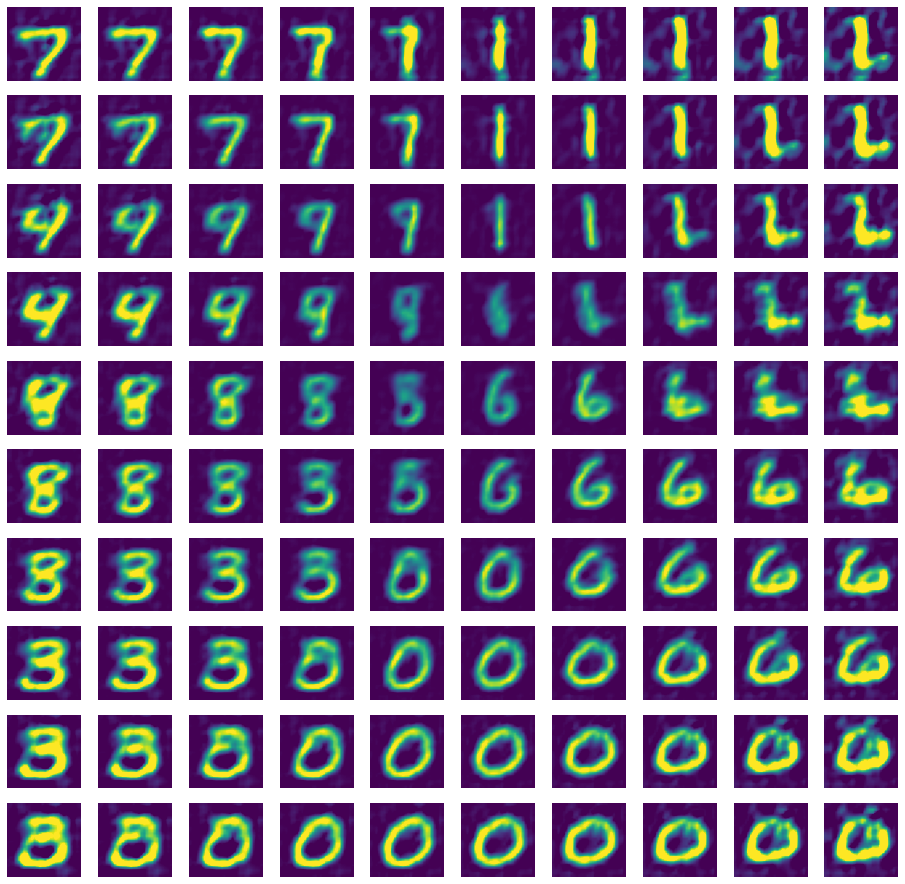

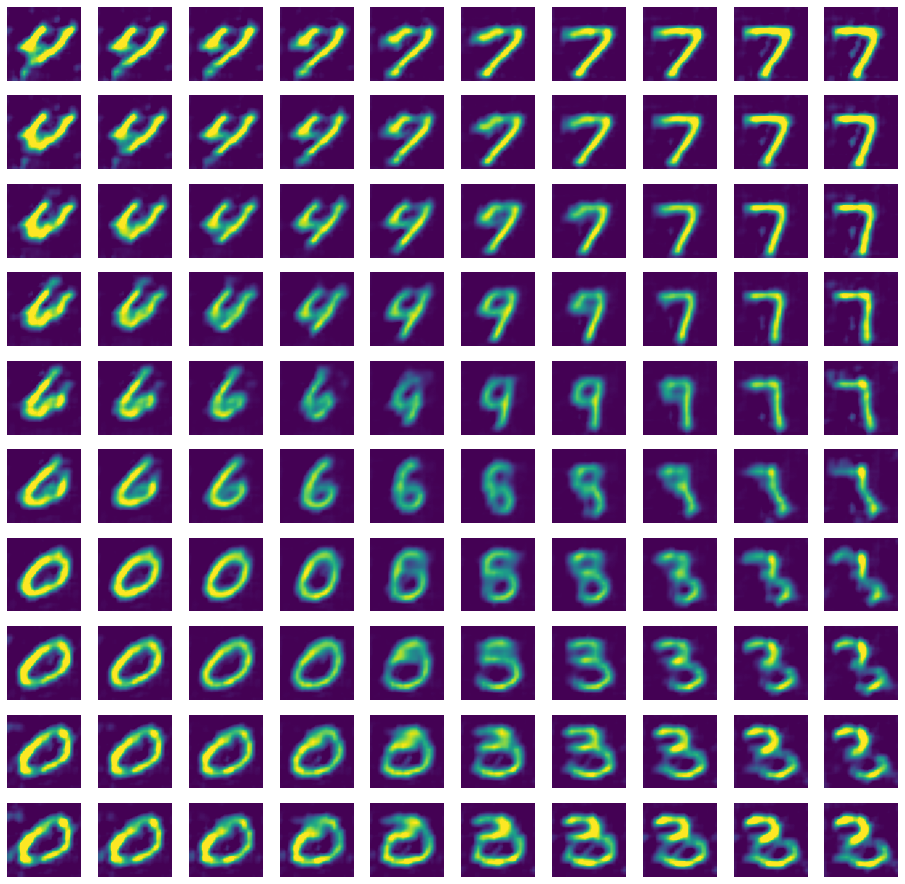

In [49]:
slic = 5

#experiment 2
cube_2 = sample_latent_space(dual_AE, x_test, num_samples, z_dim, slic)

#experiment 3
cube_3 = sample_latent_space(AE_recons, x_test, num_samples, z_dim, slic)

In [53]:
from matplotlib import animation, rc
from IPython.display import HTML, Image
plt.rcParams['animation.html'] = 'jshtml'

def create_GIF(cube, num_samples, x_test):
    nfr = cube_2.shape[-1]     # Depth
    fps = 2      # Frame per sec Speed of simulation 

    fig = plt.figure(figsize=[6, 6])
    im = plt.imshow(cube[:, :, 0], vmin=0, vmax=1, origin="upper")
    plt.xlim(0, num_samples*x_test.shape[1])
    plt.ylim(0, num_samples*x_test.shape[2])
    plt.axis('off')
    
    def update(ifrm, samples_image_cube, nfr):
        im.set_array(samples_image_cube[:, :, ifrm])
        
    ani = animation.FuncAnimation(fig, update, nfr, fargs=(cube, nfr), interval=300)
    HTML(ani.to_jshtml())
    
    ani.save('cube.gif', writer='pillow', fps=fps)
    Image(url='cube.gif')

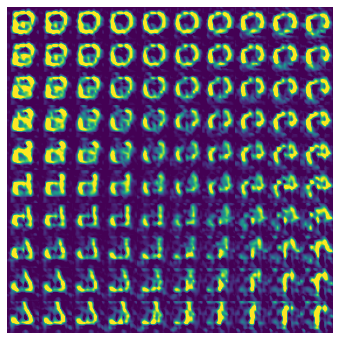

In [54]:
#experiment 2
create_GIF(cube_2, num_samples, x_test)

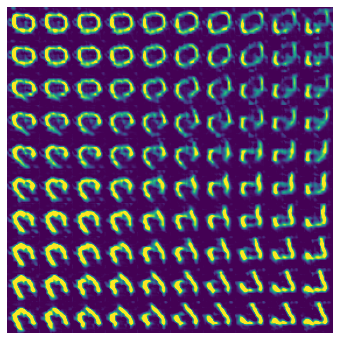

In [55]:
#experiment 3
create_GIF(cube_3, num_samples, x_test)